Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from scipy.stats import expon, loguniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import GridSearchCV

C:\Users\Kristian Røhne\AppData\Local\Temp\ipykernel_8812\4073437149.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Reading data

In [3]:
# Load data
df = pd.read_csv("train.csv", index_col=0)
df = df.drop(['index'], axis=1)
df

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Alcohol_Use (yes/no),Bilirubin (mg/dL),CRP (mg/L),Diabetes (yes/no),...,Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH,Diagnosis
0,13.571425,1653.138489,40.405592,45.598427,4,4.477126,yes,0.541997,1.002121,no,...,2.569954,97.242495,2.923385,26.696110,96.124260,315.439318,30.827639,4.180007,6.163600,Healthy
1,13.649342,1940.518305,21.336986,34.064095,55,3.190724,yes,1.199063,0.582746,no,...,3.024642,128.597676,2.719966,23.021218,50.554650,268.492437,47.896200,4.590995,5.244266,Cirrhosis
2,10.898943,1557.369920,29.665496,16.044488,30,4.506351,no,0.740952,1.670375,no,...,2.219844,98.026938,3.267757,20.123808,82.900681,312.107620,31.408057,4.524580,5.769592,Healthy
3,13.872275,1273.840525,142.418649,64.204257,0,3.665655,yes,1.939879,1.220646,no,...,1.704282,63.105133,1.937625,36.436855,72.360010,182.506010,34.577016,4.234483,5.982228,Drug-induced Liver Injury
4,10.102457,1461.622515,22.437303,23.940205,59,4.005109,no,0.769535,0.139863,no,...,2.656926,89.966713,1.979801,20.036074,63.216136,212.261519,42.384844,4.306892,4.837404,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698,13.086307,1663.149063,94.844911,81.525503,82,3.893254,yes,1.514709,4.102990,no,...,2.510571,71.561815,3.255364,13.806666,74.751383,331.761651,21.570249,4.239866,6.525677,Hepatitis
699,12.425079,1580.772607,19.152473,29.765881,8,4.434494,yes,2.497997,3.827726,no,...,3.267194,139.135093,3.741368,24.133150,51.577230,266.947184,52.120832,4.374619,6.071335,Cirrhosis
700,12.887508,1164.383286,116.825787,71.610295,14,4.002324,no,1.760204,2.456043,no,...,3.056218,141.278410,2.945887,13.363649,95.869655,260.085180,54.320054,4.369082,5.059313,Hepatitis
701,8.947665,1178.449705,7.818343,46.739457,2,3.866326,no,0.552524,4.907847,no,...,2.322946,112.506385,2.180009,15.892570,72.641767,344.926350,32.617510,4.249171,6.546267,Healthy


### Data exploration and visualisation

In [4]:
# for comparing different features to each other from the dataset, with hue as Edible
#I just made comments out of this so you dont have to read all the output

# sns.pairplot(df, hue='Diagnosis')
# plt.legend
# plt.show()

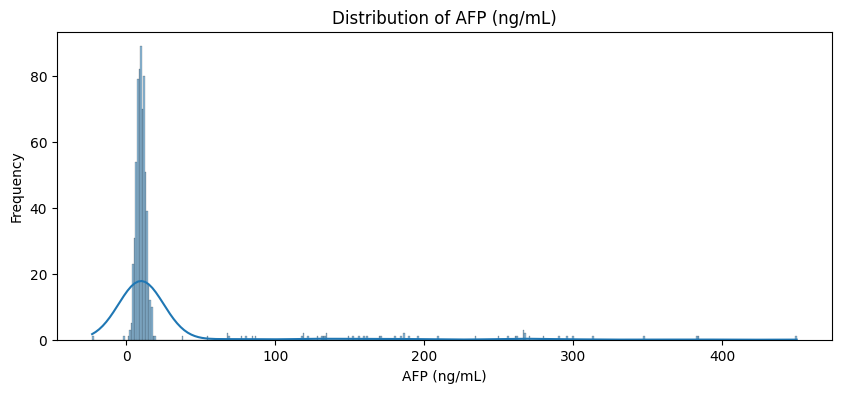

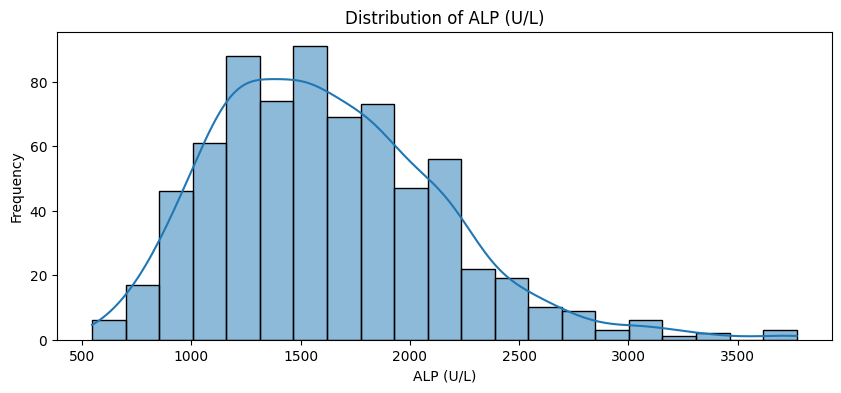

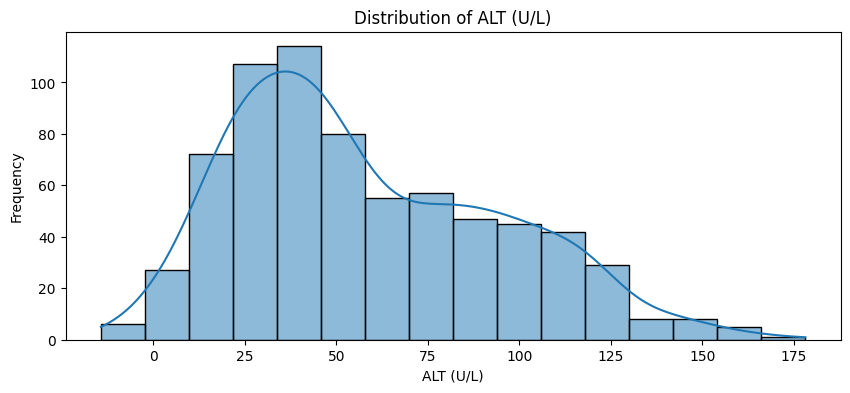

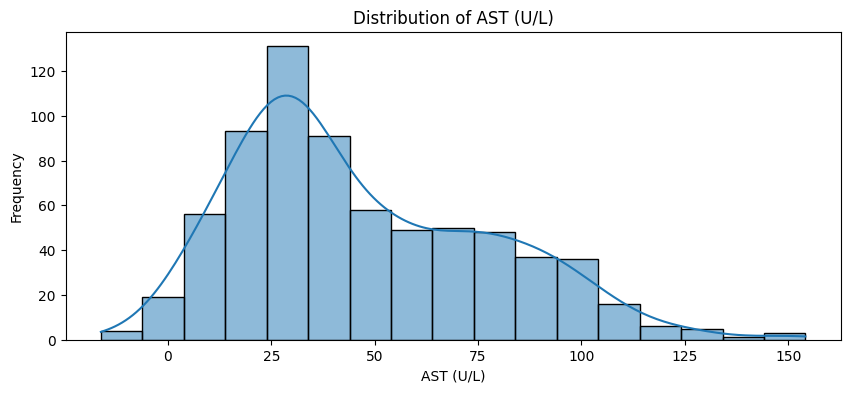

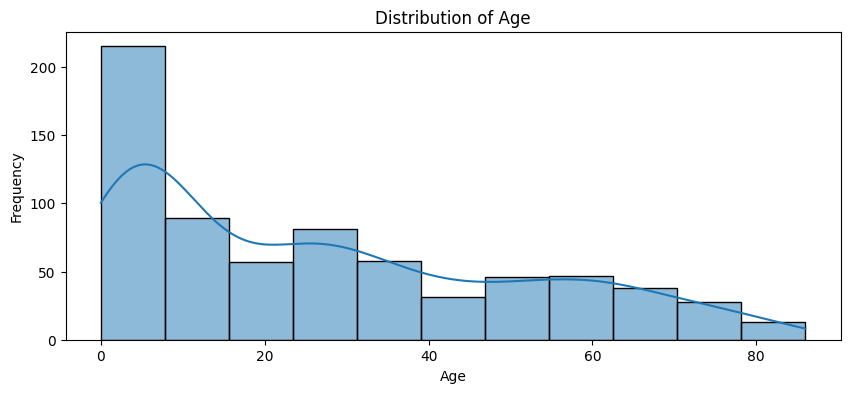

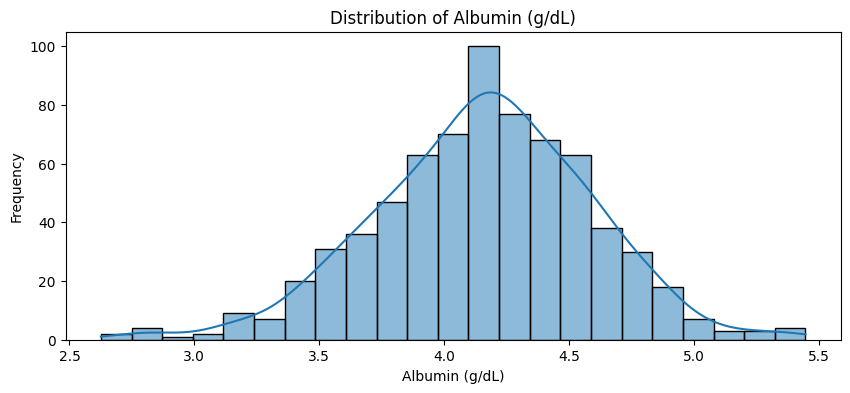

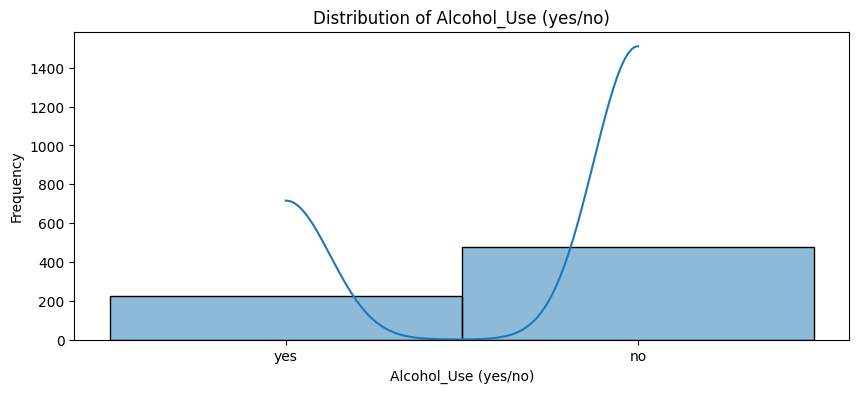

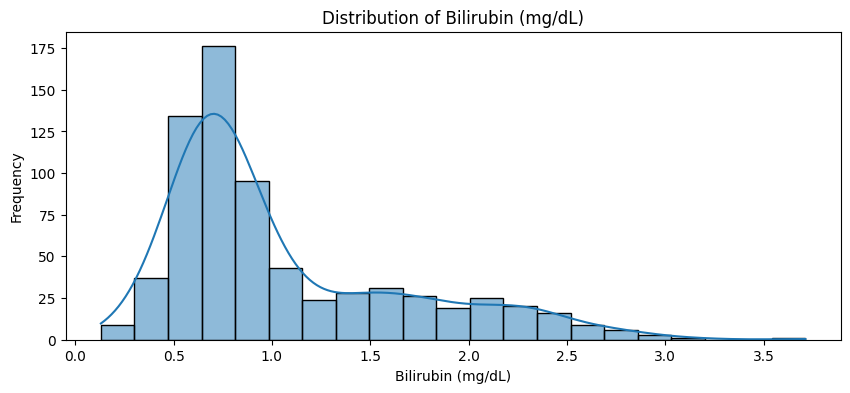

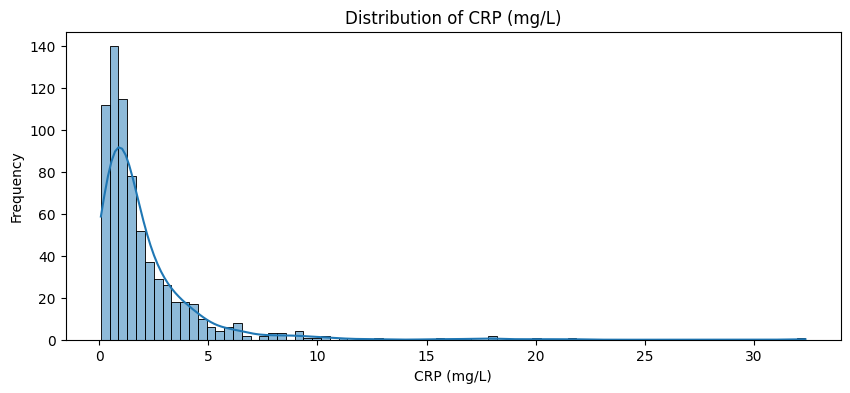

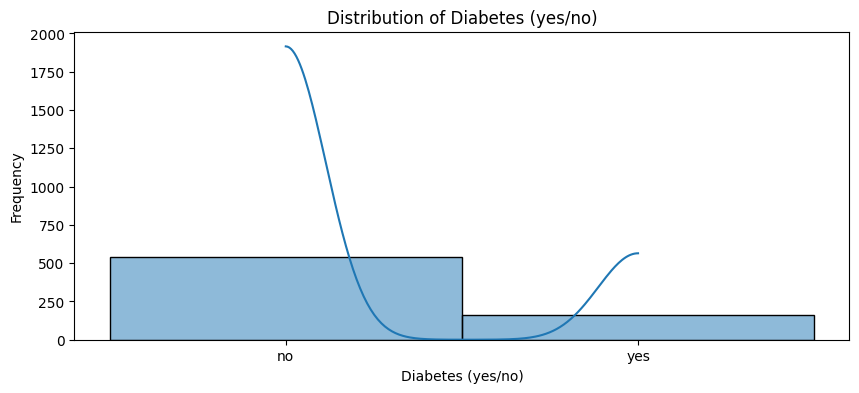

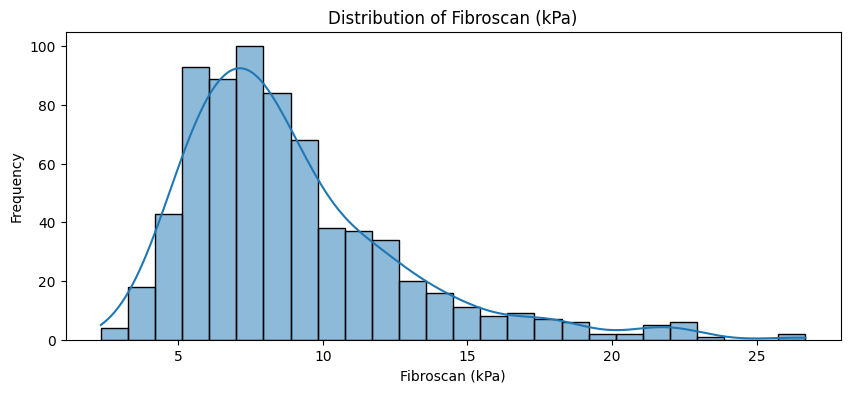

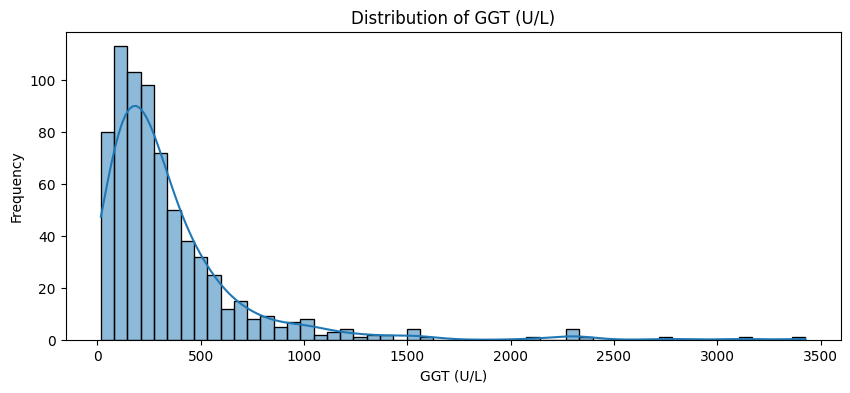

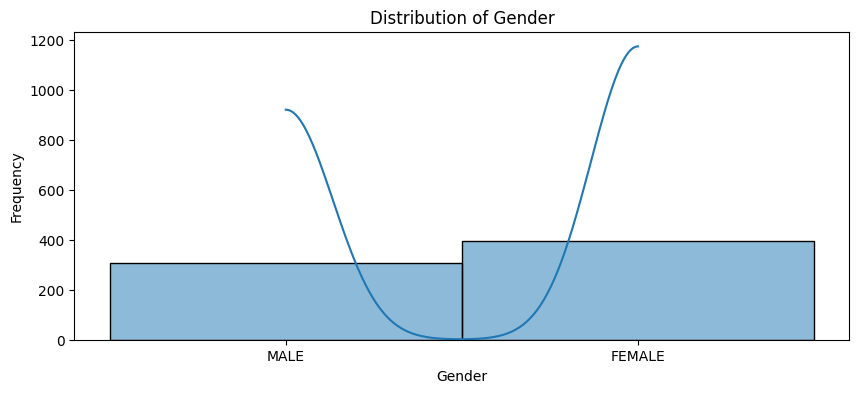

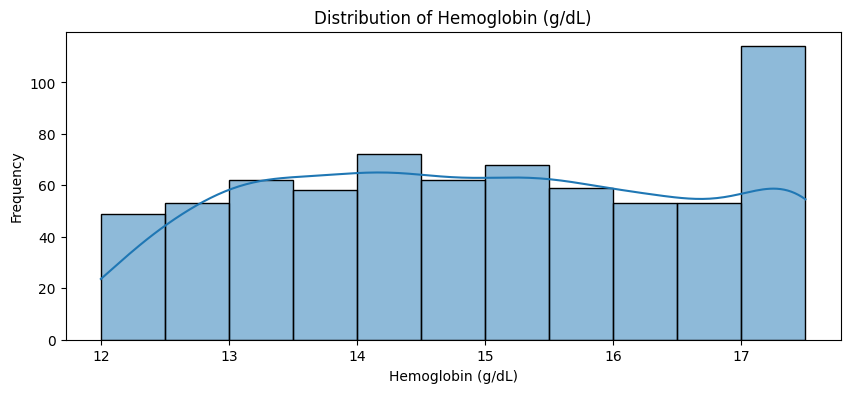

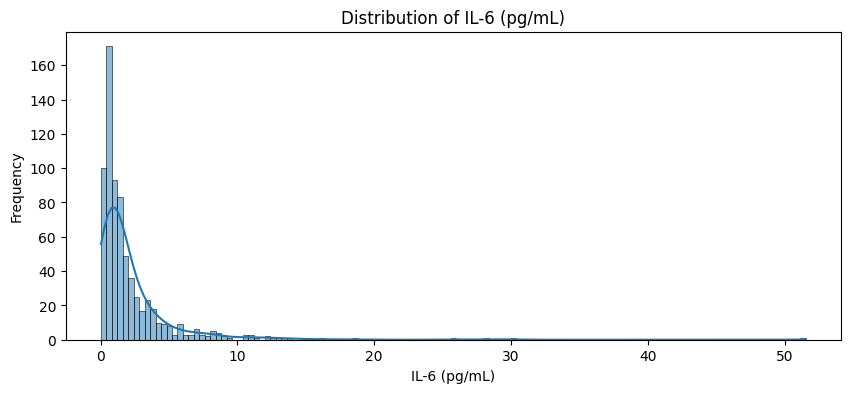

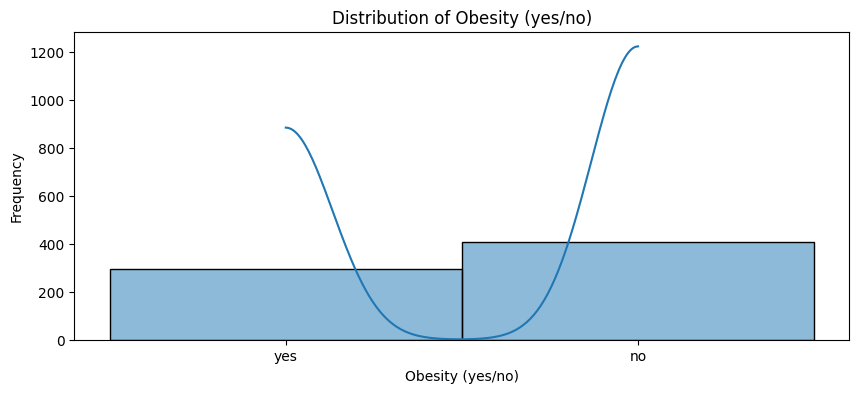

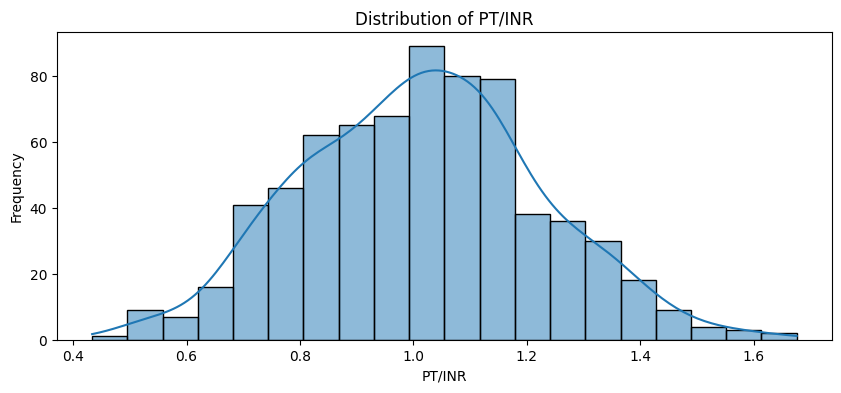

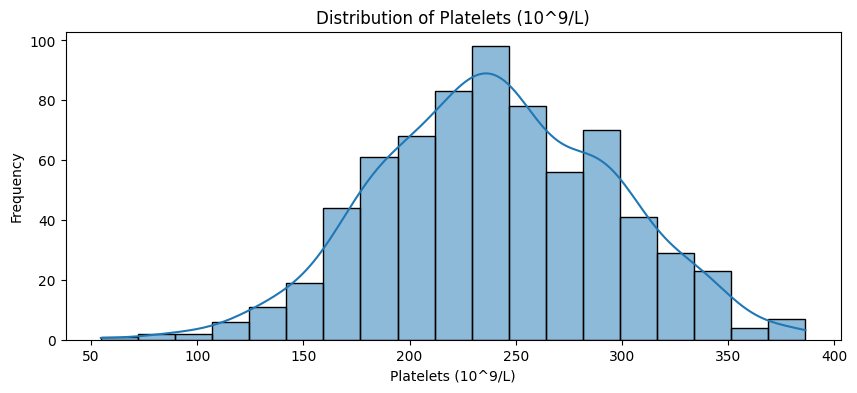

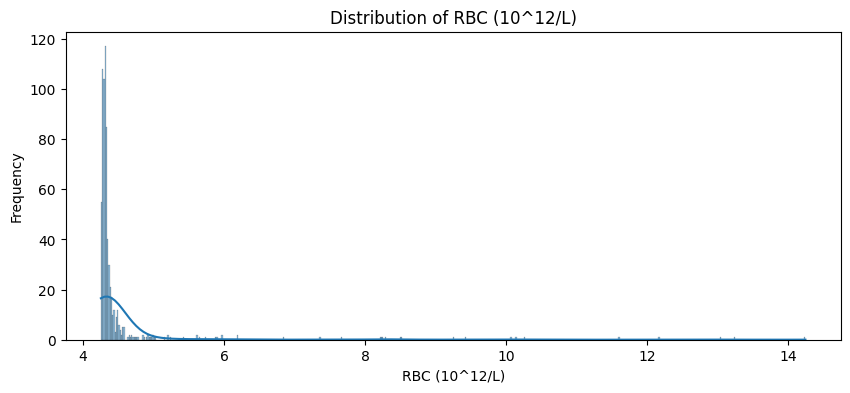

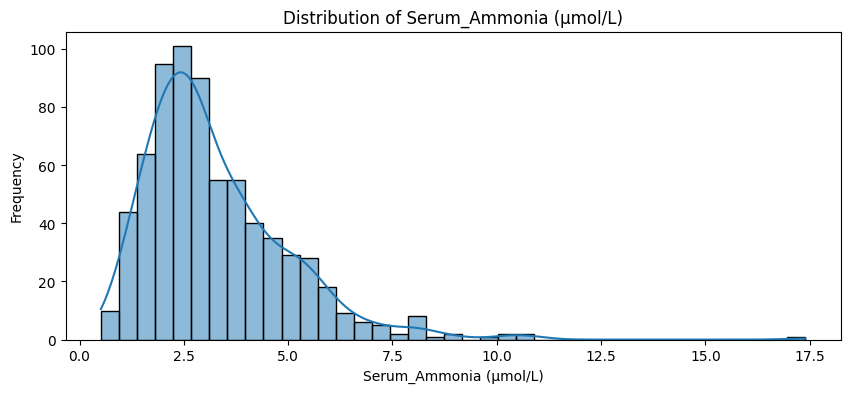

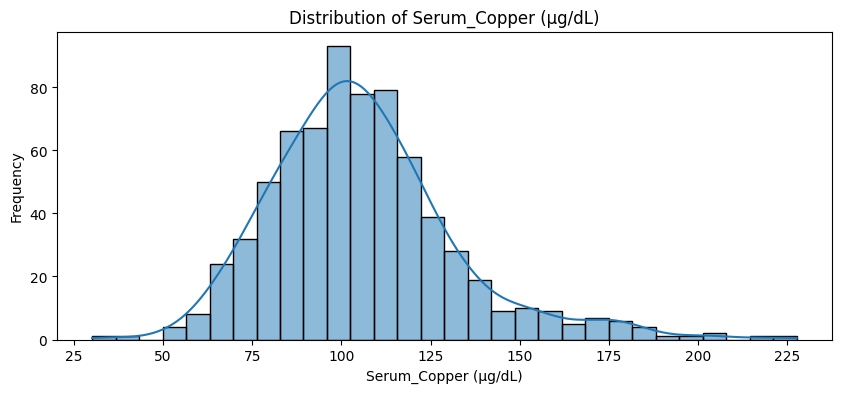

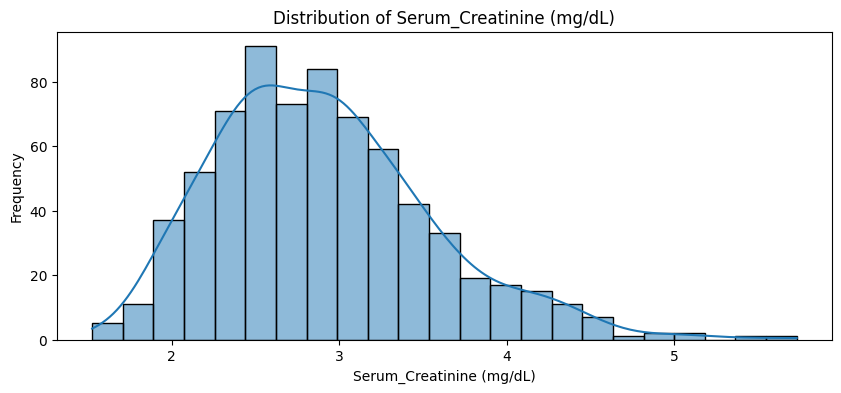

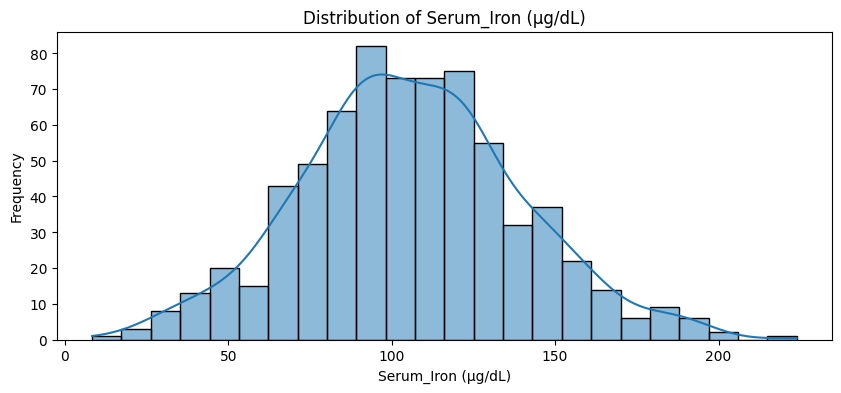

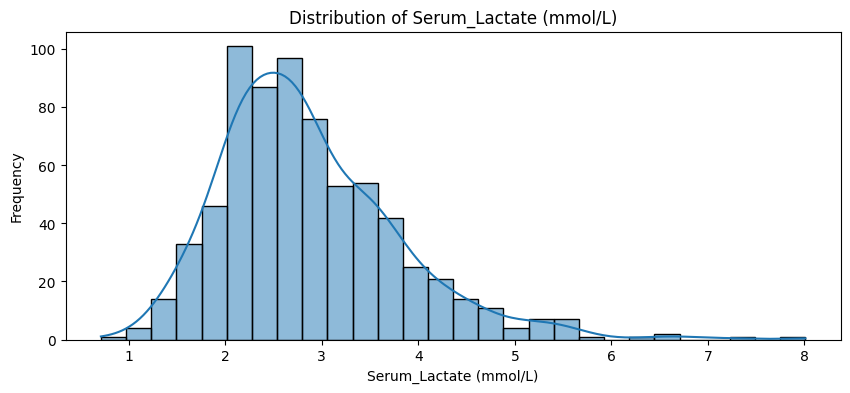

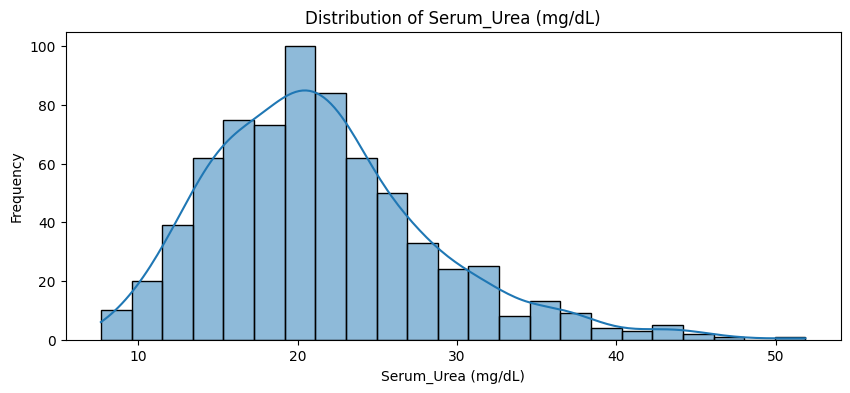

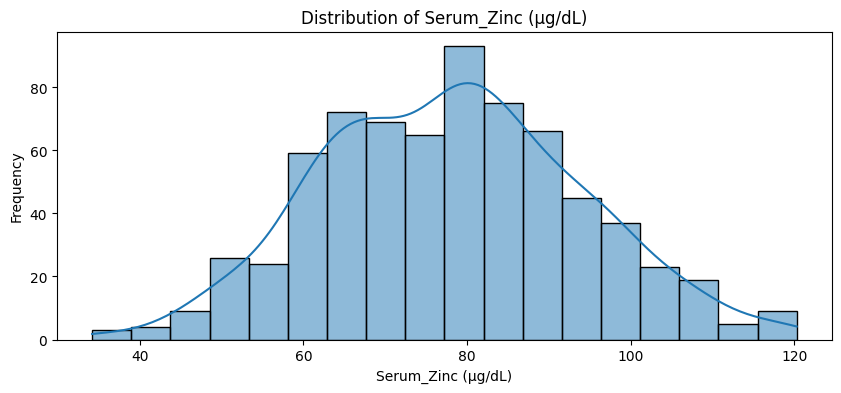

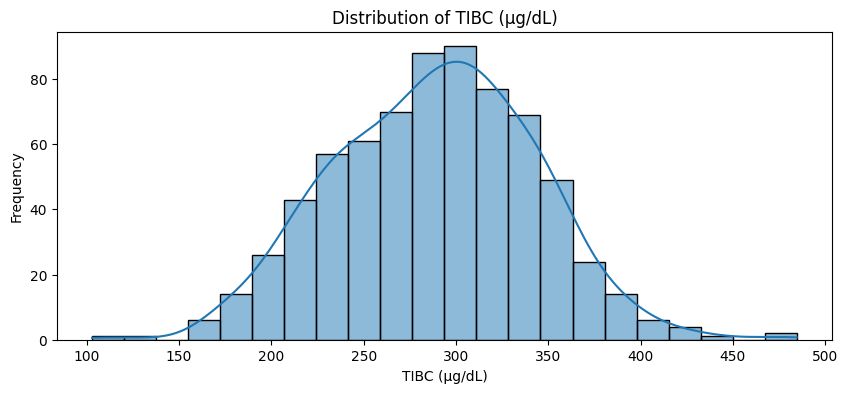

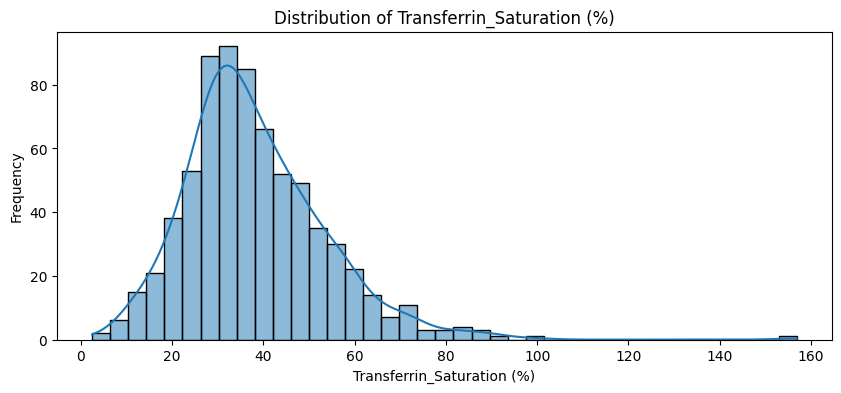

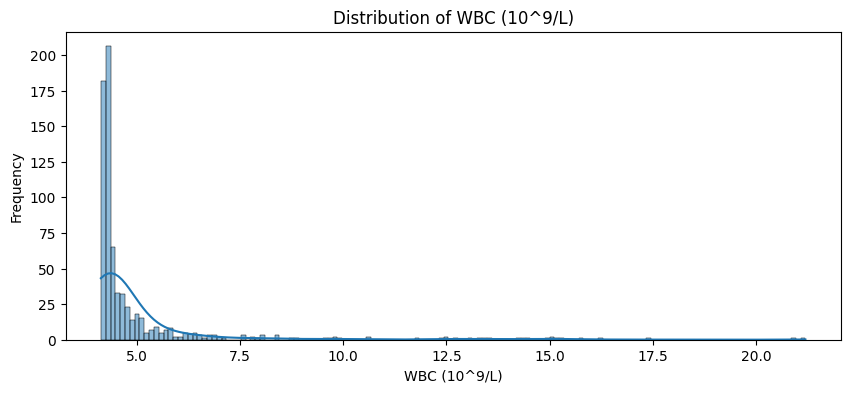

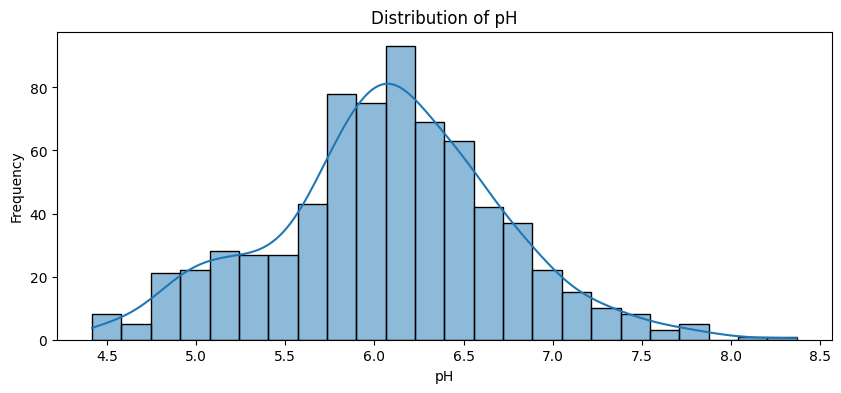

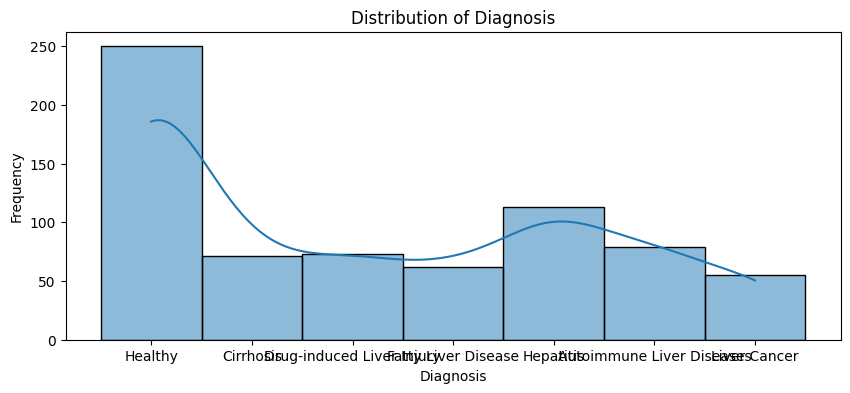

In [5]:
# For looking at the distribution of the data of each feature in the dataset 
# I just made comments out of this so you dont have to read all the output

for column in df.columns:
    plt.figure(figsize=(10, 4))
    Ssns.histplot(df[column], kde=True)  # kde (Kernel Density Estimate) adds a density curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [6]:
df.describe()

,AFP (ng/mL),ALP (U/L),ALT (U/L),AST (U/L),Age,Albumin (g/dL),Bilirubin (mg/dL),CRP (mg/L),Fibroscan (kPa),GGT (U/L),...,Serum_Copper (μg/dL),Serum_Creatinine (mg/dL),Serum_Iron (μg/dL),Serum_Lactate (mmol/L),Serum_Urea (mg/dL),Serum_Zinc (μg/dL),TIBC (μg/dL),Transferrin_Saturation (%),WBC (10^9/L),pH
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000
mean,23.804227,1624.337402,58.262199,46.855946,27.206259,4.155568,1.056841,2.021190,8.899789,347.457426,...,105.754889,2.901900,105.901892,2.867523,21.440875,78.021500,288.708468,38.220427,5.000254,6.072044
std,54.938736,517.367426,36.372428,30.838523,23.632185,0.432317,0.617223,2.638333,3.822241,371.157528,...,26.159403,0.647559,33.699054,0.936050,6.946169,15.826557,54.223207,15.438507,2.025527,0.642783
min,-22.836893,546.609117,-14.313734,-16.215535,0.000000,2.625845,0.130291,0.075035,2.323530,17.056568,...,30.099096,1.525736,8.328732,0.711997,7.641927,34.170231,102.896996,2.496813,4.129884,4.416868
25%,8.029213,1229.735749,29.939330,24.163363,5.000000,3.880943,0.634089,0.651623,6.273365,131.695741,...,88.632128,2.441051,84.737590,2.211484,16.422281,66.617374,248.832647,28.598082,4.243197,5.724293
50%,10.195074,1553.771408,48.857238,38.720602,23.000000,4.166995,0.801903,1.238123,7.966800,244.400101,...,102.842960,2.844621,104.670558,2.700933,20.668951,78.024893,290.278094,35.617342,4.331605,6.085019
75%,12.656547,1931.433883,84.583900,70.023374,45.000000,4.437957,1.396853,2.449216,10.588808,419.660403,...,118.722674,3.275906,125.937089,3.393898,25.096926,88.452369,326.508987,46.630605,4.762898,6.485114
max,449.925304,3769.332343,178.226798,154.173314,86.000000,5.447072,3.712815,32.356076,26.691648,3426.981860,...,227.617474,5.729147,223.915730,8.010270,51.875943,120.279580,484.581225,156.858874,21.195702,8.368522


In [7]:
nan_per_column = df.isna().sum()
total_nan = df.isna().sum().sum()

# To display the number of NaNs per column
print(nan_per_column)

# To display the total number of NaNs in the DataFrame
print(f"Total number of NaN values in the DataFrame: {total_nan}")


AFP (ng/mL)                   0
ALP (U/L)                     0
ALT (U/L)                     0
AST (U/L)                     0
Age                           0
Albumin (g/dL)                0
Alcohol_Use (yes/no)          0
Bilirubin (mg/dL)             0
CRP (mg/L)                    0
Diabetes (yes/no)             0
Fibroscan (kPa)               0
GGT (U/L)                     0
Gender                        0
Hemoglobin (g/dL)             0
IL-6 (pg/mL)                  0
Obesity (yes/no)              0
PT/INR                        0
Platelets (10^9/L)            0
RBC (10^12/L)                 0
Serum_Ammonia (μmol/L)        0
Serum_Copper (μg/dL)          0
Serum_Creatinine (mg/dL)      0
Serum_Iron (μg/dL)            0
Serum_Lactate (mmol/L)        0
Serum_Urea (mg/dL)            0
Serum_Zinc (μg/dL)            0
TIBC (μg/dL)                  0
Transferrin_Saturation (%)    0
WBC (10^9/L)                  0
pH                            0
Diagnosis                     0
dtype: i

## Comments on the visualisation

I found no missing values. There was features that had some outliers, but maybe some of them have their purpose, so i haven't removed them. There was some negative values in the dataset that didn't make sense, so i'm removing them

### Data cleaning

In [8]:
# Replace negative values with zero for specified columns
for column in ['AFP (ng/mL)', 'ALT (U/L)', 'AST (U/L)']:
    df[column] = df[column].apply(lambda x: max(x, 0))

## Preprocessing

In [9]:
# Separate features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Identify column types
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing steps, i make it ignore unkown categories in the OneHotEncoder
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),  # Apply standard scaling to numerical columns
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)  # Apply one-hot encoding to categorical columns
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Modelling 

In [10]:
# SVM Pipeline, focusing on getting the highest f1-macro score 
svm_pipeline = Pipeline([
    ('preprocessor', preprocessor), #adding the preprocesser 
    ('feature_selector', SFS(SVC(kernel='rbf', random_state=42),  #using rbf-kernel 
                             k_features=(5, 20), #the different combos of features i want to try
                             forward=True, #forward SFS
                             floating=True, #allowing both inclusion and exclusion of features during the  process
                             scoring='f1_macro', # getting the highest f1-macro score
                             cv=5)), #5-fold cross validation
    ('classifier', RandomizedSearchCV(SVC(kernel='rbf', random_state=42),
                                      {'C': expon(scale=1), #Finding the best value for C
                                       'gamma': ['scale', 'auto'] + list(expon(scale=0.1).rvs(size=20))}, #finding the best value for gamma
                                      n_iter=200, #how many iteartions 
                                      cv=10, #10-Fold Cross-Validation, because i felt like it
                                      scoring='f1_macro', # Focusing on getting the best f1_macro score
                                      random_state=42, 
                                      n_jobs=-1)) #using all processors avaliable when running 
                                      ])

# Fit the pipeline
svm_pipeline.fit(X_train, y_train) #fitting the training, so i can evaluate

# Evaluate the model
y_pred_svm = svm_pipeline.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print("F1-Score (Macro):", f1_svm) # getting the F1 score from the evaluation

# getting the best paramters from the evalutation
best_params_svm = svm_pipeline.named_steps['classifier'].best_params_
print("Best Parameters:", best_params_svm)


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

F1-Score (Macro): 0.7258241111670093
Best Parameters: {'C': 1.2538492877767757, 'gamma': 0.11440427450062259}


After using RandomSearch, i tried grid sarch on a smaller range around the best paramters i've found earlier. 

In [11]:
param_grid = {
    'C': np.linspace(best_params_svm['C'] * 0.5, best_params_svm['C'] * 2, 10),  # Creating 10 points between half and twice the best 'C'
    'gamma': np.linspace(best_params_svm['gamma'] * 0.5, best_params_svm['gamma'] * 2, 10)  # Creating 10 points between half and twice the best 'gamma'
}

# Since we are doing a grid search, we do not need the RandomizedSearchCV part anymore.
# We directly plug in the GridSearchCV in place of the RandomizedSearchCV in the pipeline
svm_pipeline.named_steps['classifier'] = GridSearchCV(
    SVC(kernel='rbf', random_state=42),
    param_grid,
    cv=10,  # 10-Fold Cross-Validation
    scoring='f1_macro',
    n_jobs=-1
)

# Fit the pipeline with the new GridSearchCV
svm_pipeline.fit(X_train, y_train)

# Evaluate the model with the updated classifier
y_pred_svm = svm_pipeline.predict(X_test)
f1_svm = f1_score(y_test, y_pred_svm, average='macro')
print("F1-Score (Macro) with Grid Search:", f1_svm)

# Get the best parameters from the grid search
best_params_svm_grid = svm_pipeline.named_steps['classifier'].best_params_
print("Best Parameters from Grid Search:", best_params_svm_grid)


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

F1-Score (Macro) with Grid Search: 0.7258241111670093
Best Parameters from Grid Search: {'C': 1.2538492877767757, 'gamma': 0.11440427450062259}


In [12]:
# Logistic Regression Pipeline, same procedure, just a different classifier 
logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selector', SFS(LogisticRegression(random_state=42), 
                             k_features=(5, 20), 
                             forward=True, 
                             floating=False, 
                             scoring='f1_macro', 
                             cv=5)),
    ('classifier', RandomizedSearchCV(LogisticRegression(random_state=42),
                                      {'C': loguniform(1e-4, 1e2), #getting the best value for C
                                       'penalty': ['l1', 'l2']}, #finding out which regularization works best
                                      n_iter=50, 
                                      cv=5, 
                                      scoring='f1_macro',  
                                      random_state=42, 
                                      n_jobs=-1))
])

logreg_pipeline.fit(X_train, y_train)

y_pred_lr = logreg_pipeline.predict(X_test)
f1_lr = f1_score(y_test, y_pred_lr, average='macro')
print("F1-Score (Macro):", f1_lr)

best_params_lr = logreg_pipeline.named_steps['classifier'].best_params_
print("Best Parameters:", best_params_lr)

#I made comments on the earlier pipeline

c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

F1-Score (Macro): 0.7113108157868614
Best Parameters: {'C': 0.944351568796268, 'penalty': 'l2'}


c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
90 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\linear_mo

## Confusion matrix for the best pipeline

SVM-pipeline performed best! Now i'm making a confusion matrix for the best pipeline.

c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

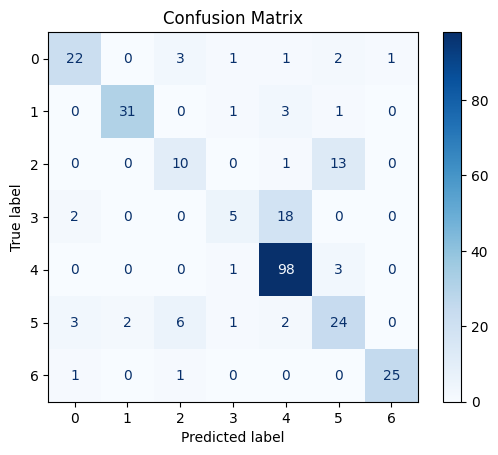

In [13]:
#Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit the pipeline
svm_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_full = svm_pipeline.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_full)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [14]:
# Fit the svm-model with the whole dataset
svm_pipeline.fit(X, y)

c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['AFP (ng/mL)', 'ALP (U/L)', 'ALT (U/L)', 'AST (U/L)', 'Age',
       'Albumin (g/dL)', 'Bilirubin (mg/dL)', 'CRP (mg/L)', 'Fibroscan (kPa)',
       'GGT (U/L)', 'Hemoglobin (g/dL)', 'IL-6 (pg/mL)', 'PT/INR',
       'Platelets (10^9/L)', 'RBC (10^12/L)', 'Serum_Ammonia (μmol/L)',
       'Serum_Copper (μg/dL)', 'Seru...
                                                                   0.15355413381132332,
                                                                   0.11440427450062259,
                                                                   0.050153007198005285,
                                                                   0.03822296727134146,
                                                                   0.013336909712854278,
                                                                   0.03366497553482072,
                                                                   0.0629154023080434,
                                                                   0.07912892625827272,
                                                                   0.05974564154230214,
                                                                   0.05114540539906354,
                                                                   0.16698938869859115,
                                                                   0.025497784195210628,
                                                                   0.2041490430558467,
                                                                   0.06705891663749092,
                                                                   0.18069039747567006,
                                                                   0.00852178284839891]},
                                    random_state=42, scoring='f1_macro'))])

In [15]:
#fit the logreg model with the whole dataset
logreg_pipeline.fit(X, y)

c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\anaconda3\envs\dat200_env\lib\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
c:\Users\Kristian Røhne\

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['AFP (ng/mL)', 'ALP (U/L)', 'ALT (U/L)', 'AST (U/L)', 'Age',
       'Albumin (g/dL)', 'Bilirubin (mg/dL)', 'CRP (mg/L)', 'Fibroscan (kPa)',
       'GGT (U/L)', 'Hemoglobin (g/dL)', 'IL-6 (pg/mL)', 'PT/INR',
       'Platelets (10^9/L)', 'RBC (10^12/L)', 'Serum_Ammonia (μmol/L)',
       'Serum_Copper (μg/dL)', 'Seru...
                 SequentialFeatureSelector(estimator=LogisticRegression(random_state=42),
                                           k_features=(5, 20),
                                           scoring='f1_macro')),
                ('classifier',
                 RandomizedSearchCV(cv=5,
                                    estimator=LogisticRegression(random_state=42),
                                    n_iter=50, n_jobs=-1,
                                    param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C66AB3C070>,
                                                         'penalty': ['l1',
                                                                     'l2']},
                                    random_state=42, scoring='f1_macro'))])

## Kaggle submission

In [16]:
# Evaluate and save results
X_test = pd.read_csv("test.csv").drop(['index'], axis=1)
svm_predictions = svm_pipeline.predict(X_test)
logreg_predictions = logreg_pipeline.predict(X_test)

# Save predictions to CSV files
pd.DataFrame({'index': X_test.index, 'Diagnosis': svm_predictions}).to_csv('svm_predictions.csv', index=False)
pd.DataFrame({'index': X_test.index, 'Diagnosis': logreg_predictions}).to_csv('logreg_predictions.csv', index=False)

## Seperate part of task

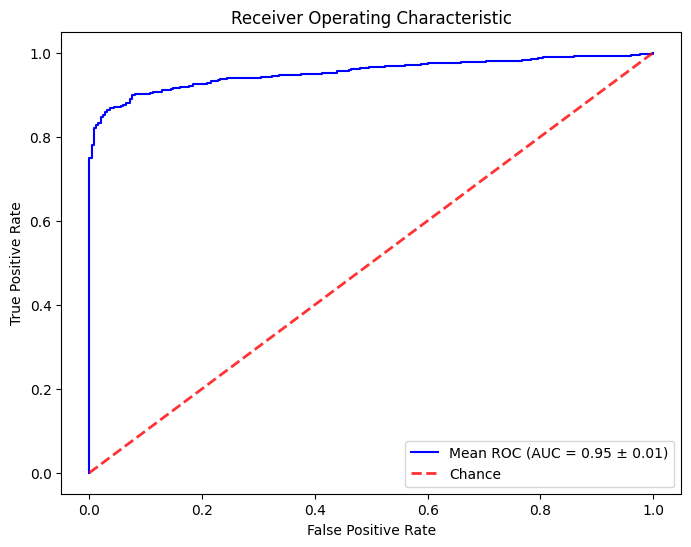

In [17]:
# Load data again, so the dataset is right every time i run this box
df = pd.read_csv("train.csv", index_col=0)
df = df.drop(['index'], axis=1)

# Replace negative values with zero for specified columns
for column in ['AFP (ng/mL)', 'ALT (U/L)', 'AST (U/L)']:
    df[column] = df[column].apply(lambda x: max(x, 0))

#Creating Condition binary 
df['ConditionBinary'] = df['Diagnosis'].apply(lambda x: 0 if x == 'Healthy' else 1) #Will be 0 if healty and 1 if sick 
df = df.drop(['Diagnosis'], axis=1)

# Separate features and target
X = df.drop('ConditionBinary', axis=1)
y = df['ConditionBinary']

# Initializes Stratified K-Fold cross-validator with 5 folds
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Set up pipeline
pipe_lr = make_pipeline(preprocessor,
                        LogisticRegression(penalty='l2', random_state=42))

# Obtain predicted probabilities using cross-validation
y_probas = cross_val_predict(pipe_lr, X, y, cv=skf, method='predict_proba')

# Compute ROC AUC scores directly during cross-validation
auc_scores = cross_val_score(pipe_lr, X, y, cv=skf, scoring='roc_auc')

# Compute mean and standard deviation of the AUC scores
mean_auc = np.mean(auc_scores)
std_auc = np.std(auc_scores)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y, y_probas[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
